### K Means
##### Clustering 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
np.random.randint?

In [39]:
#Generate random data for use in k-means clustering
data=np.random.randint(30, size=(500, 2)) #300 data points, 2 features


In [40]:
data.shape

(500, 2)

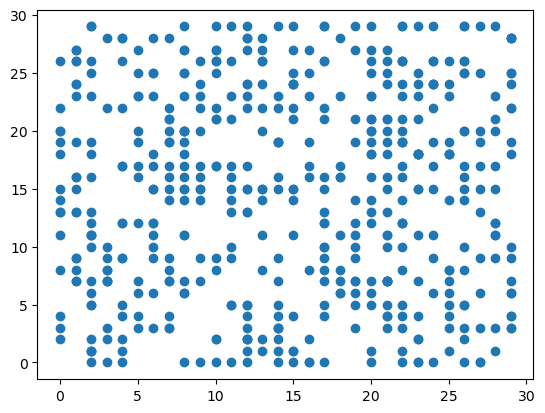

In [41]:
plt.scatter(data[:,0],data[:,1])


In [42]:
#take intial guess for centroids
def intial_centrids(data,k):
    centeroid = np.zeros((k,data.shape[1]))
    for i in range(k):
        centeroid[i] = data[ np.random.randint(data.shape[0]) ]
    return centeroid

In [43]:
centeroid = intial_centrids(data,3)

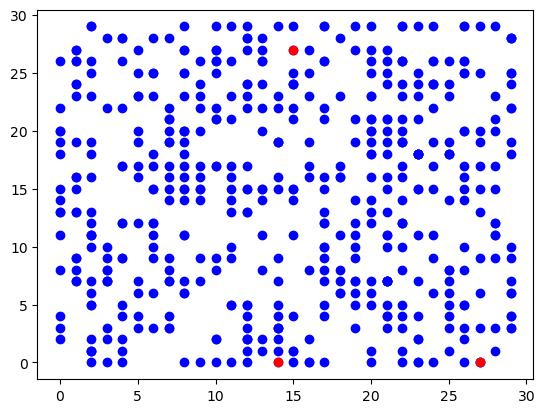

In [44]:
#plot data points and centroids

def plot(data,centeroid):
    plt.scatter(data[:,0],data[:,1],c='b')
    plt.scatter(centeroid[:,0],centeroid[:,1],c='r')
    plt.show()
    
plot(data,intial_centrids(data,3))    

In [45]:
#calculate distance between data points and centroids
def distance(data,centeroid):
    Inx = np.zeros((data.shape[0]),dtype=int)
    for i in range(data.shape[0]):
        dist_list = []
        for j in range(centeroid.shape[0]):
            dist_ij = np.linalg.norm(data[i]-centeroid[j])  
            dist_list.append(dist_ij)
        Inx[i] = np.argmin(dist_list,axis=0)
        
        #find the index of the minimum distance        
            
               
    return Inx


In [46]:
Inx = distance(data,intial_centrids(data,3))
Inx.shape

(500,)

In [47]:
Inx

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1,

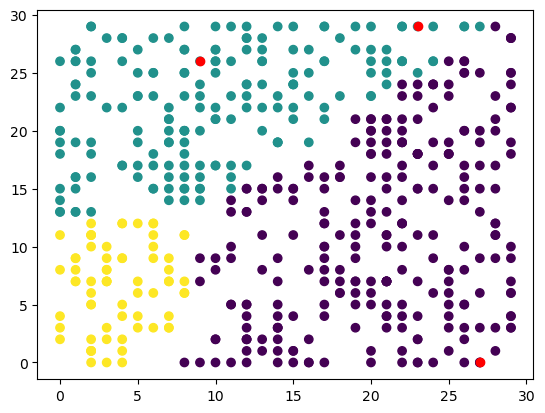

In [48]:
#plot data points and centroids
plt.scatter(data[:,0],data[:,1],c=Inx)
plt.scatter(centeroid[:,0],centeroid[:,1],c='r')

In [49]:
# comput cost function

def  compute_centroids(data,Inx,k):
    centeroid = np.zeros((k,data.shape[1]))
    for i in range(k):
        centeroid[i] = np.mean(data[Inx == i],axis=0)
    return centeroid

In [50]:
centeroid = compute_centroids(data,Inx,3)


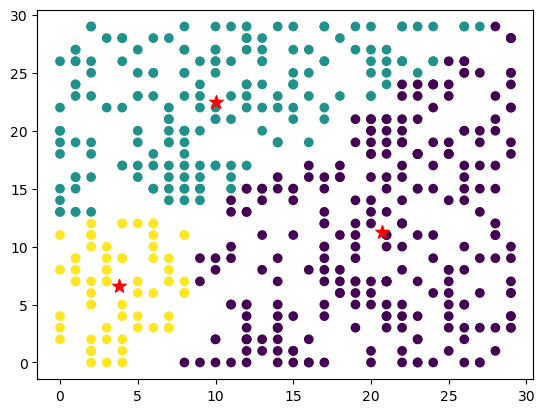

In [51]:
plt.scatter(data[:,0],data[:,1],c=Inx)
plt.scatter(centeroid[:,0],centeroid[:,1],c='r',s=100,marker='*')

In [52]:
def k_means(data,init_centeroid,iter =30):
    m = data.shape[0]
    centeroid= init_centeroid
    prev_centeroid = centeroid
    idx = np.zeros(m)
    
    for i in range(iter):
        idx = distance(data,centeroid)
        centeroid = compute_centroids(data,idx,centeroid.shape[0])
        if np.array_equal(prev_centeroid,centeroid):
            break
        prev_centeroid = centeroid
        
        return centeroid,idx
    

In [53]:
k_means(data,intial_centrids(data,3))

(array([[ 9.79344262, 16.70163934],
        [25.06451613, 20.03225806],
        [19.57843137,  3.43137255]]),
 array([1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2,
        0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0,
        0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
        2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2,
        2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1,
        0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2,
        0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1,
        0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1,
  

In [54]:
centroids,idx = k_means(data,intial_centrids(data,3))

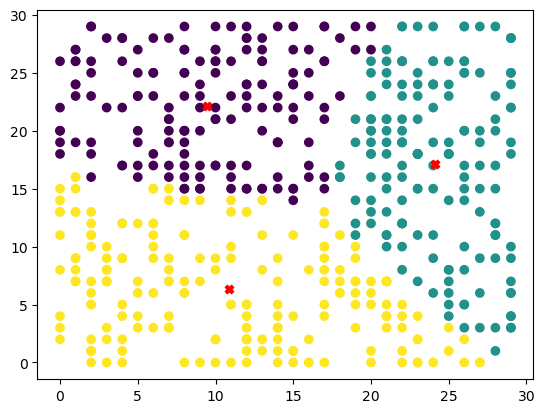

In [55]:
#plot clusters
plt.scatter(data[:,0],data[:,1],c=idx)
#plt centroids
plt.scatter(centroids[:,0],centroids[:,1],c='r',marker='X')

#make cirlce around every clusture


plt.show()

In [17]:
from sklearn.datasets import make_blobs
     

blob_centers = np.array(
    [
        [0.2,2.3],
     [-1.5,2.3],
     [-2.8 , 1.8],
     [-2.8 , 2.8],
     [-2.8 , 1.3]

    ]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])
     

X , y = make_blobs(n_samples=2000,centers=blob_centers , cluster_std=blob_std, random_state=7)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

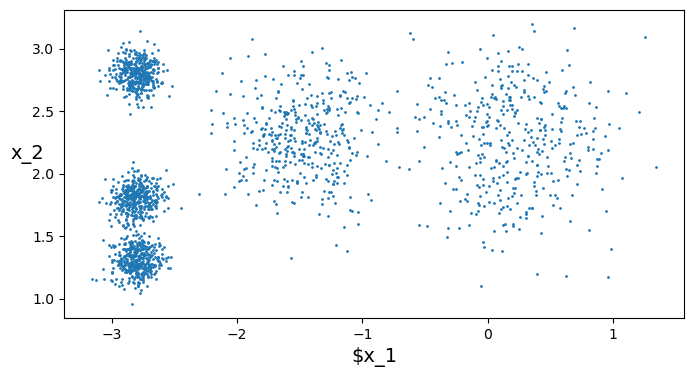

In [19]:
def plot_clusters(X,y=None):
  plt.scatter(X[:,0] , X[:,1] , c=y ,s=1 )
  plt.xlabel("$x_1" , fontsize=14)
  plt.ylabel("x_2" , fontsize=14,rotation=0)
     

plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

In [20]:
from sklearn.cluster import KMeans
     

k = 5
kmeans = KMeans(n_clusters=k , random_state=42)
y_pred = kmeans.fit_predict(X_train)
kmeans.cluster_centers_

array([[ 0.2114837 ,  2.24808413],
       [-2.80966031,  1.80297125],
       [-1.47203079,  2.26476727],
       [-2.79020298,  2.79494592],
       [-2.79867253,  1.29779179]])

In [21]:
kmeans.labels_

array([2, 0, 4, ..., 3, 1, 2])